In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


data = pd.read_csv(r"/kaggle/input/london-bike-sharing/london_merged.csv")
df = data.copy()

In [3]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### Explanation of abbreviations:

"timestamp" - timestamp field for grouping the data

"cnt" - the count of a new bike shares

"t1" - real temperature in C

"t2" - temperature in C "feels like"

"hum" - humidity in percentage

"wind_speed" - wind speed in km/h

"weather_code" - category of the weather

"is_holiday" - boolean field - 1 holiday / 0 non holiday

"is_weekend" - boolean field - 1 if the day is weekend

"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall
* 94 = Freezing Fog

In [5]:
df.rename(columns={ "t1": "real_temp",
                    "t2": "feels_like_temp",
                    "hum": "humidity"},
                    inplace=True)

In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month_name()
df["day"] = df["timestamp"].dt.day_name()
df["hour"] = df["timestamp"].dt.hour

In [7]:
df.head()

,timestamp,cnt,real_temp,feels_like_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4


# Q1: How many bikes shared in a year?

In [8]:
df_year_cnt = df.groupby("year")["cnt"].sum().reset_index()

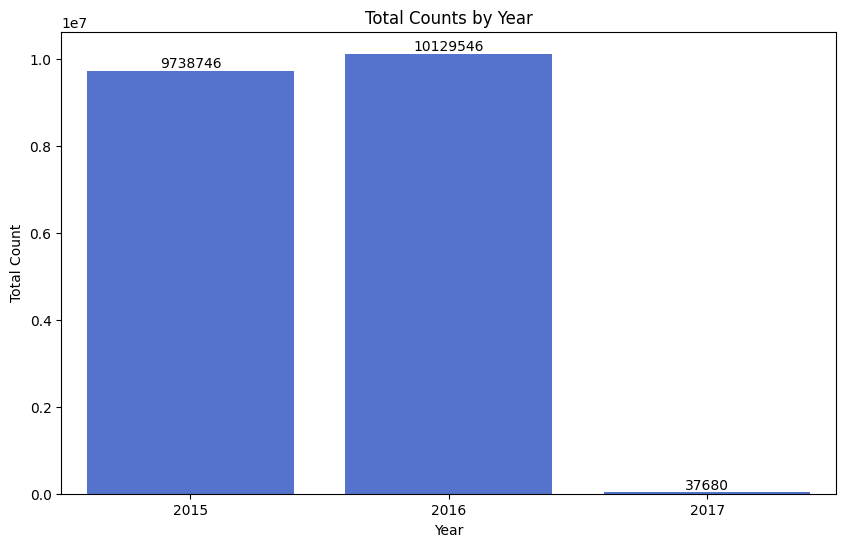

In [9]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=df_year_cnt,
            x="year", 
            y="cnt",
                color="#4169e1")

for i, value in enumerate(df_year_cnt["cnt"]):
    ax.text(i, value, str(value), ha="center", va="bottom")


plt.title("Total Counts by Year")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.show()

# Q2: Shared bikes by months.

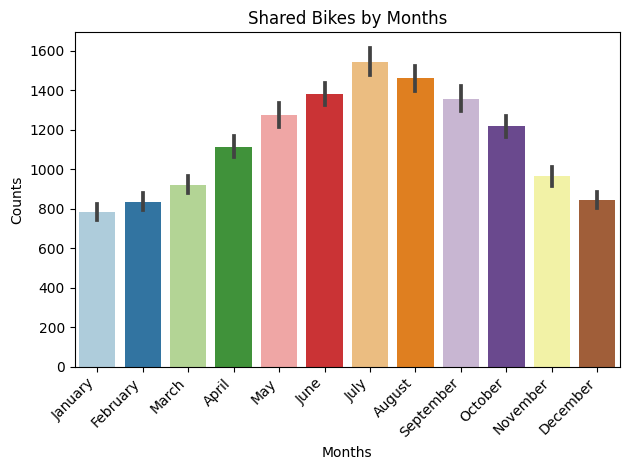

In [14]:
sns.barplot(data=df,
            x="month",
            y= "cnt", 
            palette="Paired",)

    
plt.title("Shared Bikes by Months")
plt.xlabel("Months")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




# Q3: How many bike shared by Seasons?

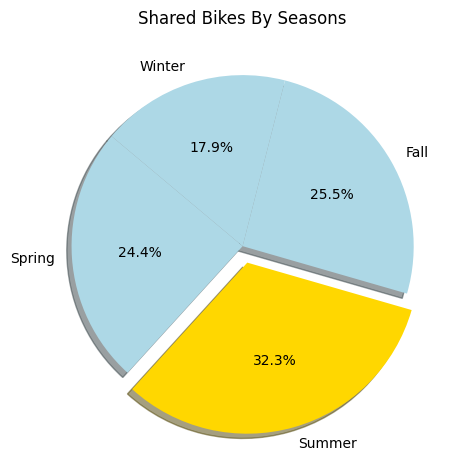

In [15]:
season_cnt = df.groupby("season")["cnt"].sum()
season_labels = {0: "Spring", 1: "Summer", 2: "Fall", 3: "Winter"}
season_cnt.index = season_cnt.index.map(season_labels)
colors = ["#add8e6","gold","#add8e6","#add8e6"]

plt.pie(season_cnt,
        labels= season_cnt.index,
        autopct= "%1.1f%%",
        startangle=140,
        colors=colors,
       explode= [0,0.10,0,0],
       shadow=True)
plt.title("Shared Bikes By Seasons")

plt.tight_layout()
plt.show()

# Q4: What is seasonal demand per hours for bikes?

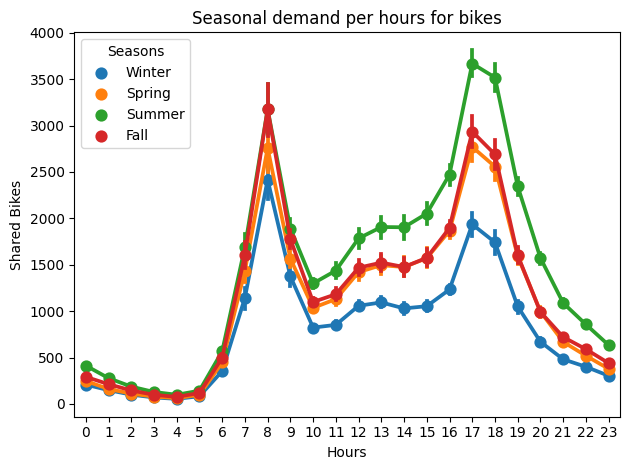

In [16]:
season = df["season"].map({0: "Spring", 1: "Summer", 2: "Fall", 3: "Winter"})

sns.pointplot(data=df, 
              x="hour",
              y="cnt", 
              hue=season,
              )
plt.title("Seasonal demand per hours for bikes")
plt.xlabel("Hours")
plt.ylabel("Shared Bikes")
plt.xticks(rotation=0)
plt.legend(title="Seasons")

plt.tight_layout()
plt.show()

# Q5: What is hourly bike share by day?

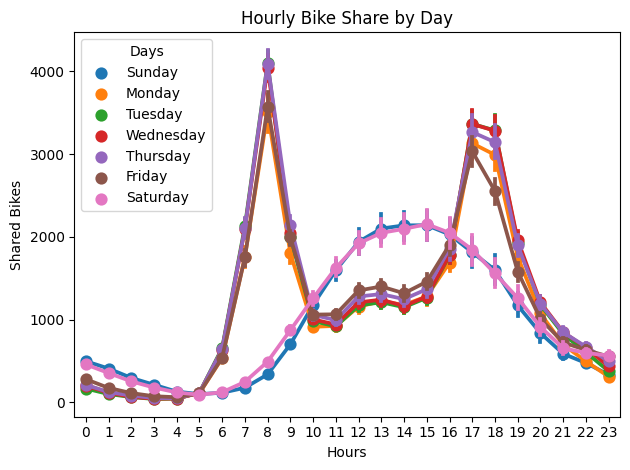

In [18]:
sns.pointplot(data=df, 
              x="hour",
              y="cnt", 
              hue="day",
              )
plt.title("Hourly Bike Share by Day")
plt.xlabel("Hours")
plt.ylabel("Shared Bikes")

plt.legend(title="Days")

plt.tight_layout()
plt.show()

# Q6: Comparison of demand for bicycles on holidays and weekends?

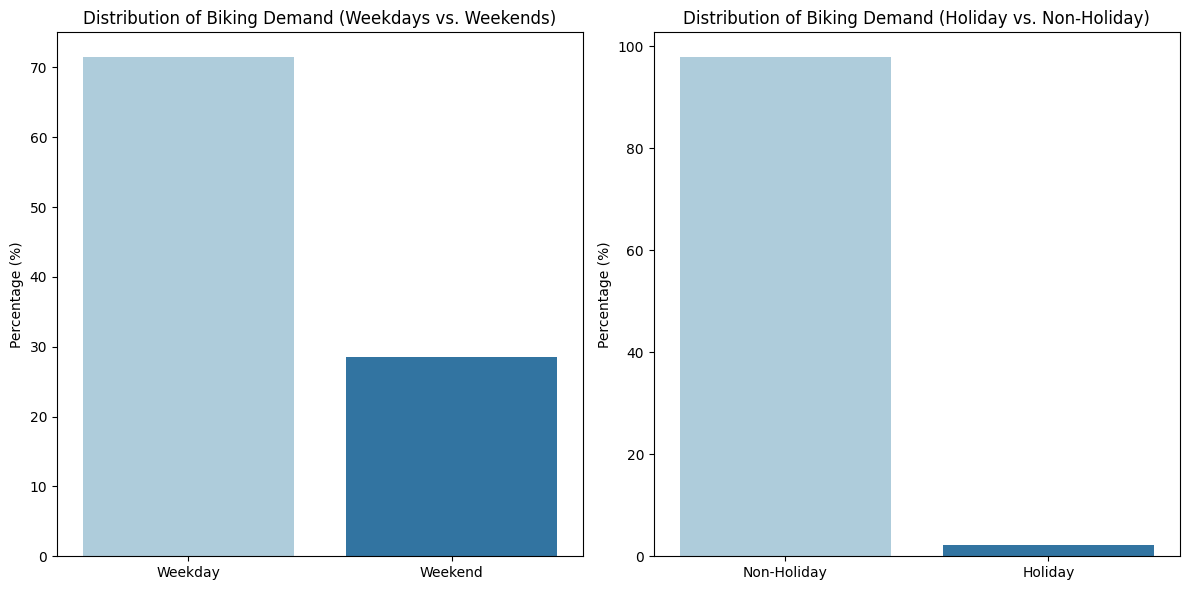

In [19]:
weekend = df["is_weekend"].map({0: "Weekday", 1: "Weekend"})
percentage_weekend = weekend.value_counts(normalize=True) * 100

holiday = df["is_holiday"].map({0: "Non-Holiday", 1: "Holiday"})
percentage_hday = holiday.value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=percentage_weekend.index,
            y=percentage_weekend.values, 
            palette="Paired",
            ax=axes[0])

axes[0].set_title("Distribution of Biking Demand (Weekdays vs. Weekends)")
axes[0].set_xlabel("")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)



sns.barplot(x=percentage_hday.index,
            y=percentage_hday.values, 
            palette="Paired",
            ax=axes[1])

axes[1].set_title("Distribution of Biking Demand (Holiday vs. Non-Holiday)")
axes[1].set_xlabel("")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Q7: Biking Demand by Day of the Week (Percentage) & Seasonal Demand per Day for Bikes (Counts)

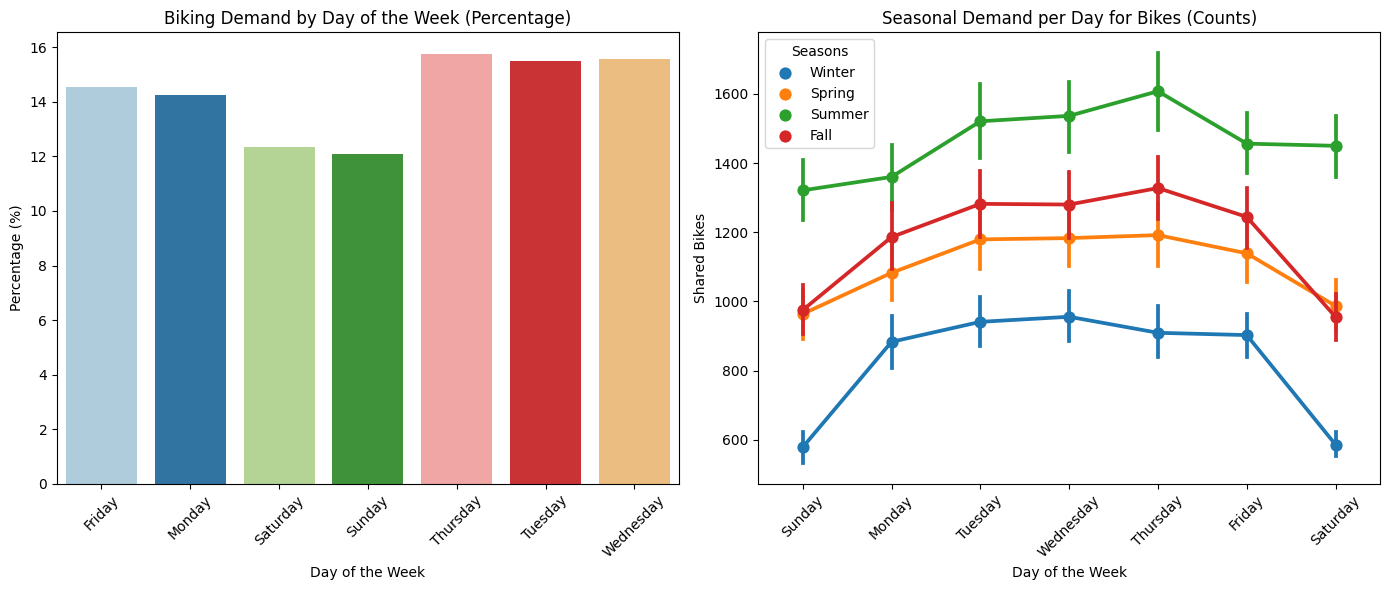

In [20]:
cnt_by_day = df.groupby("day")["cnt"].sum()
total_count = cnt_by_day.sum()
cnt_by_day_percentage = (cnt_by_day / total_count) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=cnt_by_day_percentage.index, 
            y=cnt_by_day_percentage.values,
            palette="Paired",
            ax=axes[0])

axes[0].set_title("Biking Demand by Day of the Week (Percentage)")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Percentage (%)")
axes[0].tick_params(axis='x', rotation=45)

sns.pointplot(data=df, 
              x="day",
              y="cnt",
              hue=season,
              ax=axes[1])

axes[1].set_title("Seasonal Demand per Day for Bikes (Counts)")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Shared Bikes")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Seasons")

plt.tight_layout()
plt.show()

# Q7: Correlation between weather condition and bike sharing.

In [21]:
df["reversed_weather_code"] = df["weather_code"].max() - df["weather_code"]


correlation = df[["reversed_weather_code", "cnt"]].corr().iloc[0, 1]

print(f"Correlation between reversed_weather_code and bike shraing: {correlation:.2f}")

Correlation between reversed_weather_code and bike shraing: 0.17


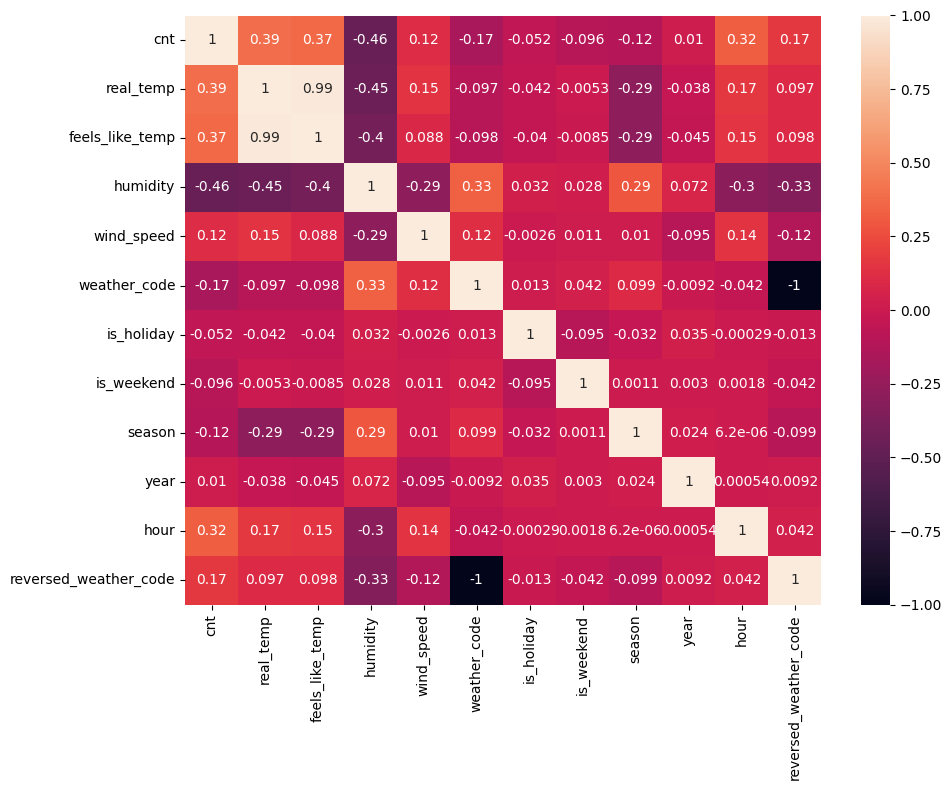

In [23]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr,
           annot=True)

plt.tight_layout()
plt.show()

# Let's export the dataframe as .csv in order to visualize in Power BI

In [26]:
df.to_csv(r"london_bike_shares_cleaned.csv")

# The End!